In [2]:
import pandas as pd
import numpy as np
from itertools import product

%load_ext autoreload
%autoreload 2
import pipeline_functions

import matplotlib.pyplot as plt

In [2]:
"Each dataframe should be a request for a new datapoint"
"In our pipeline functions, every time the file already exists, do nothing"
results_df = pd.DataFrame()

# Perform Splits

In [ ]:
# No need for more than 1 test split at the moment

# Create Outlier Sets

In [17]:
# For each proportion from 0 to 0.10, create 30 outlier sets from the mammographic dataset

dataset_filenames = ["cleaned-datasets/mammographic.csv"]
outlier_methods = ["infeasExamRandomLabel"]
alphas = [10.0]
epsilons = [10.0]
outlier_proportions = np.arange(0, 0.11, 0.01)
outlier_random_states = range(30)

outlier_combinations = product(dataset_filenames, outlier_methods, alphas, epsilons, outlier_proportions, outlier_random_states)

outlier_df = pd.DataFrame(outlier_combinations, columns=["dataset_filename", "outlier_method", "alpha", "epsilon", "outlier_proportion", "outlier_random_state"])

# outlier_df["dataset_filename"] = outlier_df["dataset_filename"].astype(pd.StringDtype())
# outlier_df["outlier_method"] = outlier_df["outlier_method"].astype(pd.StringDtype())

In [ ]:
pipeline_functions.create_outlier_sets(outlier_df)
outlier_df.to_csv("cleaned-datasets/mammographic/outlier_df.csv")

In [ ]:
# Only consider 0 <= outlier_random_state < 10
truncated_outlier_df = outlier_df[(outlier_df["outlier_random_state"] >= 0) & (outlier_df["outlier_random_state"] < 10)]

In [21]:
# Import
outlier_df = pd.read_csv("cleaned-datasets/mammographic/outlier_df.csv", index_col=0)

## Visualize Outliers

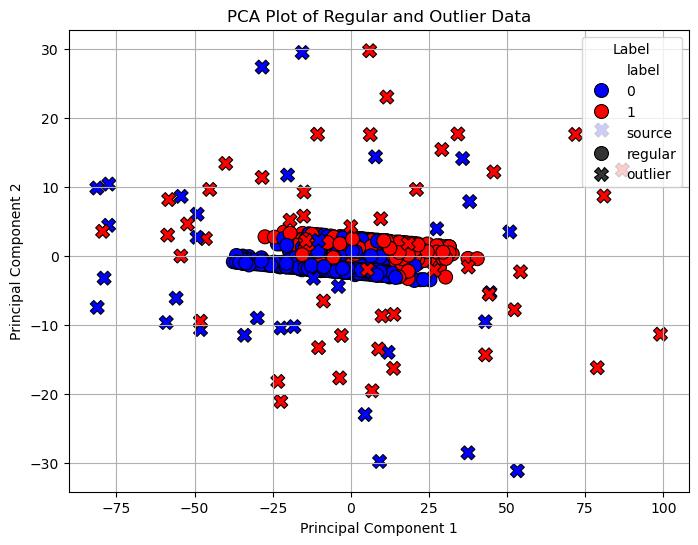

In [70]:
from sklearn.decomposition import PCA
import seaborn as sns

# Pick one with 0.10 outliers
example_row = outlier_df[outlier_df["outlier_proportion"] == 0.10].iloc[0]

example_genuine_df = pd.read_csv(example_row["dataset_filename"], index_col=0)
example_outlier_df = pd.read_csv(example_row["outlier_dataset_filename"], index_col=0)

# Add a new column to distinguish genuine from outlier
example_genuine_df['source'] = 'regular'
example_outlier_df['source'] = 'outlier'

example_df = pd.concat([example_genuine_df, example_outlier_df], axis=0)

# Extract X and y
example_X = example_df.drop(columns=['label', 'source'])
example_y = example_df['label']
example_sources = example_df['source']

# Apply PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
example_X_pca = pca.fit_transform(example_X)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot genuine and outlier data with different markers and colors for label, using 'seaborn' color palette for the label distinction
sns.scatterplot(x=example_X_pca[:, 0], y=example_X_pca[:, 1], hue=example_y, style=example_sources, 
                palette={0: 'blue', 1: 'red'},
                markers={'regular': 'o', 'outlier': 'X'}, 
                s=100, edgecolor='k')

# Customize plot appearance
plt.title('PCA Plot of Regular and Outlier Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label', loc='upper right')
plt.grid(True)
plt.show()

# Evaluate Logistic Regression

In [ ]:
# Create by joining test and train splits with the corresponding outliers
logistic_regression_df = outlier_df.copy()

logistic_regression_df["train_dataset_filename"] = "cleaned-datasets/mammographic/train_dataset-test_proportion=0.3-random_state=0.csv"
logistic_regression_df["test_dataset_filename"] = "cleaned-datasets/mammographic/test_dataset-test_proportion=0.3-random_state=0.csv"

logistic_regression_df["classifier_type"] = "LogisticRegression"
logistic_regression_df["LogisticRegression.penalty"] = "l2"

In [30]:
pipeline_functions.evaluate_classifiers(logistic_regression_df)

In [39]:
logistic_regression_df.to_csv("cleaned-datasets/mammographic/logistic_regression_df.csv")

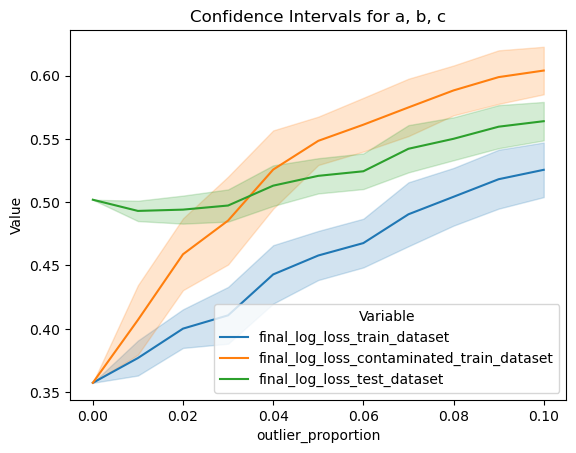

In [37]:
plot_confidence_intervals(logistic_regression_df, ['final_log_loss_train_dataset', 'final_log_loss_contaminated_train_dataset', 'final_log_loss_test_dataset'])

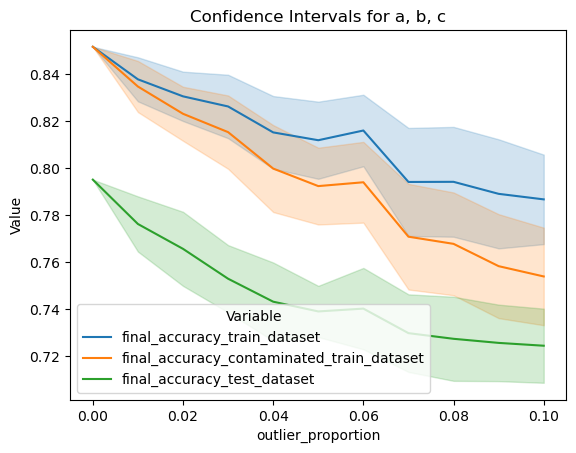

In [38]:
plot_confidence_intervals(logistic_regression_df, ['final_accuracy_train_dataset', 'final_accuracy_contaminated_train_dataset', 'final_accuracy_test_dataset'])

# Evaluate Gradient Trees

In [52]:
# First, let's try only the default set of parameters

GBDT_df = outlier_df.copy()

GBDT_df["train_dataset_filename"] = "cleaned-datasets/mammographic/train_dataset-test_proportion=0.3-random_state=0.csv"
GBDT_df["test_dataset_filename"] = "cleaned-datasets/mammographic/test_dataset-test_proportion=0.3-random_state=0.csv"
GBDT_df["classifier_type"] = "GradientBoostingClassifier"

n_estimators = [200]
loss = ["log_loss"]
# max_depth = range(1, 3+1)       # expand to 1...6
max_depth = range(1, 5+1)
learning_rate = [0.75]

# dataset_filenames = ["cleaned-datasets/mammographic.csv"]
# outlier_methods = ["infeasExamRandomLabel"]
# alphas = [10.0]
# epsilons = [10.0]
# outlier_proportions = np.arange(0, 0.11, 0.01)
# outlier_random_states = range(30)

GBDT_arguments_combinations = product(n_estimators, loss, max_depth, learning_rate)
GBDT_arguments_df = pd.DataFrame(GBDT_arguments_combinations, columns=["GradientBoostingClassifier.n_estimators", "GradientBoostingClassifier.loss", "GradientBoostingClassifier.max_depth", "GradientBoostingClassifier.learning_rate"])

GBDT_df = GBDT_df.merge(GBDT_arguments_df, how="cross")

In [53]:
pipeline_functions.evaluate_classifiers(GBDT_df)

starting row 1 of 1650
starting row 2 of 1650
starting row 3 of 1650
starting row 4 of 1650
starting row 5 of 1650
starting row 6 of 1650
starting row 7 of 1650
starting row 8 of 1650
starting row 9 of 1650
starting row 10 of 1650
starting row 11 of 1650
starting row 12 of 1650
starting row 13 of 1650
starting row 14 of 1650
starting row 15 of 1650
starting row 16 of 1650
starting row 17 of 1650
starting row 18 of 1650
starting row 19 of 1650
starting row 20 of 1650
starting row 21 of 1650
starting row 22 of 1650
starting row 23 of 1650
starting row 24 of 1650
starting row 25 of 1650
starting row 26 of 1650
starting row 27 of 1650
starting row 28 of 1650
starting row 29 of 1650
starting row 30 of 1650
starting row 31 of 1650
starting row 32 of 1650
starting row 33 of 1650
starting row 34 of 1650
starting row 35 of 1650
starting row 36 of 1650
starting row 37 of 1650
starting row 38 of 1650
starting row 39 of 1650
starting row 40 of 1650
starting row 41 of 1650
starting row 42 of 1650
s

# Compiling into master df

In [54]:
GBDT_df.to_csv("cleaned-datasets/mammographic/GBDT_df_part6.csv")

In [36]:
part1 = pd.read_csv("cleaned-datasets/mammographic/GBDT_df_part1.csv", index_col=0)
part1filtered = part1.loc[part1["GradientBoostingClassifier.learning_rate"].isin({0.05, 0.1, 0.15})]

part2 = pd.read_csv("cleaned-datasets/mammographic/GBDT_df_part2.csv", index_col=0)
part2filtered = part2.loc[part2["GradientBoostingClassifier.learning_rate"].isin({0.05, 0.1, 0.15})]


In [42]:
part3 = pd.read_csv("cleaned-datasets/mammographic/GBDT_df_part3.csv", index_col=0)
part3filtered = part3.loc[part3["GradientBoostingClassifier.learning_rate"].isin({1.0})]

In [43]:
part4 = pd.read_csv("cleaned-datasets/mammographic/GBDT_df_part4.csv", index_col=0)
part4filtered = part4.loc[part4["GradientBoostingClassifier.learning_rate"].isin({1.0})]

In [ ]:
part5 = pd.read_csv("cleaned-datasets/mammographic/GBDT_df_part5.csv", index_col=0)
part5filtered = part5

part6 = pd.read_csv("cleaned-datasets/mammographic/GBDT_df_part6.csv", index_col=0)
part6filtered = part6

In [57]:
GBDT_master_df = pd.concat([part1filtered, part2filtered, part5filtered, part6filtered, part3filtered, part4filtered], ignore_index=True)

In [58]:
GBDT_master_df["GradientBoostingClassifier.learning_rate"].value_counts()

GradientBoostingClassifier.learning_rate
0.05    1650
0.10    1650
0.15    1650
0.20    1650
0.25    1650
0.50    1650
0.75    1650
1.00    1650
Name: count, dtype: int64

In [60]:
GBDT_master_df.sort_values(by=["GradientBoostingClassifier.max_depth", "GradientBoostingClassifier.learning_rate", "outlier_proportion", "outlier_random_state"],
                           ignore_index = True, inplace=True)

In [ ]:
# GBDT_master_df.to_csv("cleaned-datasets/mammographic/GBDT_master_df.csv")

In [63]:
import pandas as pd

# Initialize an empty list to store summary data
summary_data = []

# Extract unique combinations of the first three columns
unique_combinations = GBDT_master_df[["outlier_proportion", 
                                 "GradientBoostingClassifier.max_depth", 
                                 "GradientBoostingClassifier.learning_rate"]].drop_duplicates()

# Iterate over each unique combination
for _, row in unique_combinations.iterrows():
    outlier_proportion = row["outlier_proportion"]
    max_depth = row["GradientBoostingClassifier.max_depth"]
    learning_rate = row["GradientBoostingClassifier.learning_rate"]

    # Filter the matching rows in master_df
    matching_rows = GBDT_master_df[
        (GBDT_master_df["outlier_proportion"] == outlier_proportion) &
        (GBDT_master_df["GradientBoostingClassifier.max_depth"] == max_depth) &
        (GBDT_master_df["GradientBoostingClassifier.learning_rate"] == learning_rate)
    ]

    # Read all loss and accuracy dataframes for these rows
    loss_dataframes = [pd.read_csv(filename) for filename in matching_rows["loss_data_filename"]]
    accuracy_dataframes = [pd.read_csv(filename) for filename in matching_rows["accuracy_data_filename"]]

    # Combine data for each boosting round (0 to 199)
    for boosting_round in range(200):
        # Calculate mean log loss values
        mean_log_loss_train = pd.concat([df.iloc[[boosting_round]]["log_loss_train_dataset"] for df in loss_dataframes]).mean()
        mean_log_loss_contaminated = pd.concat([df.iloc[[boosting_round]]["log_loss_contaminated_train_dataset"] for df in loss_dataframes]).mean()
        mean_log_loss_test = pd.concat([df.iloc[[boosting_round]]["log_loss_test_dataset"] for df in loss_dataframes]).mean()

        # Calculate mean accuracy values
        mean_accuracy_train = pd.concat([df.iloc[[boosting_round]]["accuracy_train_dataset"] for df in accuracy_dataframes]).mean()
        mean_accuracy_contaminated = pd.concat([df.iloc[[boosting_round]]["accuracy_contaminated_train_dataset"] for df in accuracy_dataframes]).mean()
        mean_accuracy_test = pd.concat([df.iloc[[boosting_round]]["accuracy_test_dataset"] for df in accuracy_dataframes]).mean()

        # Append the row to summary data
        summary_data.append({
            "outlier_proportion": outlier_proportion,
            "GradientBoostingClassifier.max_depth": max_depth,
            "GradientBoostingClassifier.learning_rate": learning_rate,
            "boosting_round": boosting_round,
            "mean_log_loss_train_dataset": mean_log_loss_train,
            "mean_log_loss_contaminated_train_dataset": mean_log_loss_contaminated,
            "mean_log_loss_test_dataset": mean_log_loss_test,
            "mean_accuracy_train_dataset": mean_accuracy_train,
            "mean_accuracy_contaminated_train_dataset": mean_accuracy_contaminated,
            "mean_accuracy_test_dataset": mean_accuracy_test,
        })

# Convert the summary data to a dataframe
GBDT_master_summary_df = pd.DataFrame(summary_data)

In [65]:
GBDT_master_summary_df.to_csv("cleaned-datasets/mammographic/GBDT_master_summary_df.csv")

# Analysis

In [1]:
example_loss_df = pd.read_csv(GBDT_df.iloc[-1]["loss_data_filename"], index_col = 0)

# Plot using pandas' built-in plotting capabilities
example_loss_df.plot(y=['log_loss_train_dataset', 'log_loss_contaminated_train_dataset', 'log_loss_test_dataset'], kind='line', marker='o')

# Show the plot
plt.title('Plot of index vs a, b, and c')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(['log_loss_train_dataset', 'log_loss_contaminated_train_dataset', 'log_loss_test_dataset'])
plt.grid(True)
plt.show()

NameError: name 'pd' is not defined

In [7]:
# ex_df = pd.read_csv(df["outlier_dataset_filename"].iloc[0], index_col = 0)
GBDT_df = pd.read_csv("cleaned-datasets/mammographic/GBDT_df_part1.csv", index_col=0)

ex_train_df = pd.read_csv(GBDT_df["train_dataset_filename"].iloc[0], index_col = 0)
ex_outlier_df = pd.read_csv(GBDT_df["outlier_dataset_filename"].iloc[0], index_col = 0).astype(ex_train_df.dtypes.to_dict())
ex_contaminated_df = pd.concat([ex_train_df, ex_outlier_df], axis=0, ignore_index=True)

ex_test_df = pd.read_csv(GBDT_df["test_dataset_filename"].iloc[0], index_col = 0)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


# clf = LogisticRegression()
clf = GradientBoostingClassifier(learning_rate=1)

clf.fit(pipeline_functions.get_X(ex_contaminated_df), pipeline_functions.get_y(ex_contaminated_df))

GradientBoostingClassifier(learning_rate=1)

In [16]:
clf.score(ex_test_df.drop("label", axis=1), ex_test_df["label"])

0.7469879518072289

In [ ]:
pd.read_csv(GBDT_df.iloc[0]["loss_data_filename"], index_col=0)

,log_loss_train_dataset,log_loss_contaminated_train_dataset,log_loss_test_dataset
0,0.693094,0.693094,0.692411
1,0.693094,0.693094,0.692411
2,0.693094,0.693094,0.692411
3,0.693094,0.693094,0.692411
4,0.693094,0.693094,0.692411
...,...,...,...
195,0.693094,0.693094,0.692411
196,0.693094,0.693094,0.692411
197,0.693094,0.693094,0.692411
198,0.693094,0.693094,0.692411


In [ ]:
clf.score(ex3_df.drop("label", axis=1), ex3_df["label"])

LogisticRegression()

In [84]:
from sklearn.metrics import log_loss

log_loss(pipeline_functions.get_y(ex_df), clf.predict_proba(pipeline_functions.get_X(ex_df)))

0.6384978697903688

In [85]:
clf.predict_proba(pipeline_functions.get_X(ex_df))

array([[0.33057983, 0.66942017],
       [0.23010016, 0.76989984],
       [0.3243119 , 0.6756881 ],
       [0.46518899, 0.53481101],
       [0.52757397, 0.47242603],
       [0.61719351, 0.38280649],
       [0.25636378, 0.74363622],
       [0.21357941, 0.78642059],
       [0.39244179, 0.60755821],
       [0.3691495 , 0.6308505 ],
       [0.54103326, 0.45896674],
       [0.28890211, 0.71109789],
       [0.42731681, 0.57268319],
       [0.3897995 , 0.6102005 ],
       [0.38983573, 0.61016427],
       [0.38219279, 0.61780721],
       [0.39612995, 0.60387005],
       [0.31582512, 0.68417488],
       [0.58975943, 0.41024057],
       [0.29401404, 0.70598596],
       [0.49249771, 0.50750229],
       [0.25017504, 0.74982496],
       [0.3217524 , 0.6782476 ],
       [0.42060059, 0.57939941],
       [0.35785084, 0.64214916],
       [0.34750213, 0.65249787],
       [0.39012557, 0.60987443],
       [0.59067357, 0.40932643],
       [0.29174629, 0.70825371],
       [0.27226729, 0.72773271],
       [0.

In [86]:
clf.score(*pipeline_functions.get_X_y(ex_df))

0.6341463414634146

In [18]:
for i, row in df.iterrows():
    print(row.keys())

Index(['dataset_filename', 'test_proportion', 'dataset_split_random_state',
       'outlier_method', 'alpha', 'epsilon', 'outlier_proportion',
       'outlier_random_state', 'classifier_type',
       'LogisticRegression.penalty'],
      dtype='object')


In [21]:
a1, a2, a3 = [1 + k for k in range(3)]